In [27]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [28]:
job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}


df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)

In [29]:
df_companies

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverage,"346,000+"


In [33]:
df_jobs.merge(df_companies, on='company_name')

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


In [38]:
df_Vie = df[df['job_country'] == 'Vietnam'].copy()
df_Vie['job_posted_month'] = df_Vie['job_posted_date'].dt.strftime('%B')
df_Vie_pivot = df_Vie.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_Vie_pivot = df_Vie_pivot.reset_index()
df_Vie_pivot['month_no'] = pd.to_datetime(df_Vie_pivot['job_posted_month'], format='%B').dt.month
df_Vie_pivot = df_Vie_pivot.sort_values('month_no')
df_Vie_pivot = df_Vie_pivot.set_index('job_posted_month')
df_Vie_pivot = df_Vie_pivot.drop(columns='month_no')

df_Vie_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,9.0,4.0,43.0,61.0,33.0,5.0,7.0,21.0,11.0,22.0
February,4.0,2.0,25.0,33.0,25.0,9.0,6.0,15.0,8.0,8.0
March,5.0,2.0,26.0,44.0,25.0,4.0,4.0,17.0,4.0,13.0
April,6.0,3.0,22.0,58.0,25.0,5.0,4.0,17.0,6.0,23.0
May,3.0,2.0,17.0,38.0,19.0,11.0,3.0,12.0,2.0,4.0
June,7.0,1.0,24.0,60.0,16.0,14.0,8.0,16.0,6.0,13.0
July,3.0,NaN,24.0,52.0,19.0,5.0,8.0,11.0,4.0,9.0
August,4.0,4.0,12.0,61.0,29.0,7.0,5.0,17.0,6.0,9.0
September,9.0,NaN,21.0,49.0,33.0,7.0,3.0,9.0,5.0,14.0


In [41]:
df_Vie_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

df_Vie_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [43]:
df_Vie_merge = df_Vie_pivot.merge(df_Vie_software_pivot, on="job_posted_month")

In [50]:
top_5 = (
    df_Vie_merge
    .sum()
    .sort_values(ascending=False)
    .head()
    .index
    .to_list() # Get the index of top 5
)

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

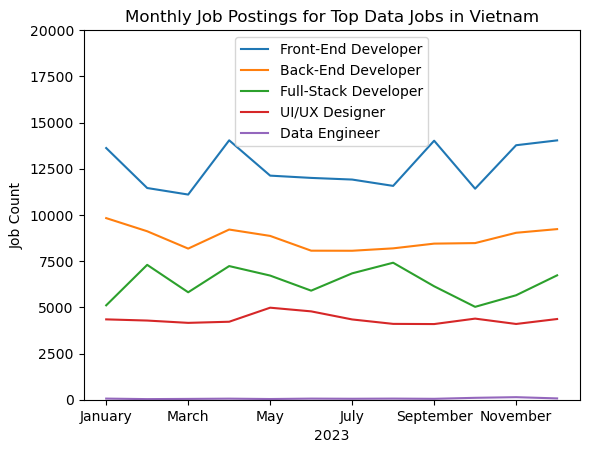

In [54]:
df_Vie_merge[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in Vietnam')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 20000)
plt.legend()
plt.show()